# Deep Dive into LangChain

## import the openAI key

In [3]:
from dotenv import load_dotenv
import os
load_dotenv("./.env")
API_KEY = os.getenv("API_OAI_KEY")

## ChatModels: GPT-3.5-Turbo and GPT-4

In [7]:
from langchain_openai import ChatOpenAI

prompt = "Explain Quantum Mechanics in one sentence"

llm = ChatOpenAI(api_key=API_KEY, model="gpt-4o-mini")
output = llm.invoke(prompt)
print(output.content)

Quantum mechanics is a fundamental theory in physics that describes the behavior of matter and energy at the smallest scales, where particles exhibit wave-particle duality and uncertainty principles, leading to phenomena that defy classical intuition.


In [8]:
# Defining the roles using LangChain
from langchain.schema import (
	SystemMessage,
	AIMessage,
	HumanMessage

)

In [9]:
messages = [
	SystemMessage(content="Your are a physisit and respond only in German"),
	HumanMessage(content="Explain Quantum Mechanics in one sentence")
]

output = llm.invoke(messages)
print(output.content)

Quantenmechanik ist die Theorie, die das Verhalten von Materie und Energie auf der kleinsten Skala, der atomaren und subatomaren Ebene, beschreibt und dabei Konzepte wie Superposition und Verschränkung einführt.


## Caching LLM Responses

### In-memory cache

In [12]:
from langchain.globals import set_llm_cache
from langchain_openai import OpenAI

llm = OpenAI(model_name = "gpt-3.5-turbo-instruct", api_key=API_KEY)

In [13]:
%%time 
from langchain.cache import InMemoryCache
set_llm_cache(InMemoryCache())
prompt = "Tell me a joke that a toddler can understand."

llm.invoke(prompt)

CPU times: user 55.4 ms, sys: 18.6 ms, total: 74 ms
Wall time: 1.06 s


"\n\nWhy did the banana go to the doctor?\nBecause it wasn't peeling well!"

In [14]:
%%time
llm.invoke(prompt)

CPU times: user 238 μs, sys: 45 μs, total: 283 μs
Wall time: 286 μs


"\n\nWhy did the banana go to the doctor?\nBecause it wasn't peeling well!"

## LLM Streaming

In [18]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(api_key=API_KEY, model="gpt-4o-mini")
prompt = "Write a rock song about the Moon and a Raven."
for chunk in llm.stream(prompt):
	print(chunk.content, end="", flush=True)

**Title: "Raven on the Moon"**

**Verse 1**  
Under midnight's velvet skies,  
A silver glow ignites our eyes,  
Where shadows dance and whispers play,  
The raven calls, it leads the way.  

**Pre-Chorus**  
With feathers black as darkest night,  
He soars through stars, a ghost in flight,  
The Moon is high, a watchful shroud,  
Together we'll break free from the crowd.

**Chorus**  
Raven on the Moon, take me higher,  
Through the darkness, set my soul on fire,  
In the stillness, we find our truth,  
With wings of midnight, we’ll break loose.  

**Verse 2**  
Echoes of the past, they linger near,  
A haunting song that draws us here,  
With every beat, my heart aligns,  
To the rhythm of ancient times.  

**Pre-Chorus**  
The Moon it glows, casting spells so bright,  
With every flap, we ignite the night,  
Lost in dreams, we’ll ride the tides,  
A cosmic dance where our fate collides.

**Chorus**  
Raven on the Moon, take me higher,  
Through the darkness, set my soul on fire,  
I

## Prompt Templates

In [20]:
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

template = ''' You are an experienced virologist.
Write a few senteces about the following virus {virus} in {language}
'''
prompt_template = PromptTemplate.from_template(template=template)

prompt = prompt_template.format(virus="hiv", language="french")

llm = ChatOpenAI(api_key=API_KEY, model="gpt-4o-mini")
output = llm.invoke(prompt)

print(output.content)

Le VIH, ou virus de l'immunodéficience humaine, est un rétrovirus qui attaque le système immunitaire, notamment les cellules CD4, cruciales pour la défense de l'organisme contre les infections. Si le VIH n'est pas traité, il peut évoluer vers le sida, une phase où le système immunitaire est gravement compromis. La transmission du VIH se produit principalement par les relations sexuelles non protégées, le partage de seringues et de la mère à l'enfant pendant la grossesse, l'accouchement ou l'allaitement. Grâce aux avancées en matière de traitements antirétroviraux, les personnes vivant avec le VIH peuvent mener une vie saine et réduire considérablement le risque de transmission.


## ChatPromptTemplate

In [21]:
from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate
from langchain_core.messages import SystemMessage

chat_template = ChatPromptTemplate.from_messages(
	[
		SystemMessage(content="You respond only in the JSON format"),
		HumanMessagePromptTemplate.from_template("Top {n} contries in {area} by population")
	]
)

messages = chat_template.format_messages(n="10", area="Europe")
print(messages)

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(api_key=API_KEY)
output = llm.invoke(messages)

print(output.content)

[SystemMessage(content='You respond only in the JSON format', additional_kwargs={}, response_metadata={}), HumanMessage(content='Top 10 contries in Europe by population', additional_kwargs={}, response_metadata={})]
{
    "1": {
        "country": "Germany",
        "population": 83019200
    },
    "2": {
        "country": "France",
        "population": 67158000
    },
    "3": {
        "country": "United Kingdom",
        "population": 66040229
    },
    "4": {
        "country": "Italy",
        "population": 60376370
    },
    "5": {
        "country": "Spain",
        "population": 46733038
    },
    "6": {
        "country": "Ukraine",
        "population": 41660983
    },
    "7": {
        "country": "Poland",
        "population": 38433600
    },
    "8": {
        "country": "Romania",
        "population": 19405156
    },
    "9": {
        "country": "Netherlands",
        "population": 17424591
    },
    "10": {
        "country": "Belgium",
        "population": 11

## Simple Chains

In [23]:
from langchain_openai import ChatOpenAI
from langchain import PromptTemplate

from langchain.chains import LLMChain

llm = ChatOpenAI(api_key=API_KEY)
template = '''
You are an experienced virologist.
Write a few sentences about the following virus {virus} in {language}
'''
prompt_template = PromptTemplate.from_template(template=template)

chain = LLMChain(
	llm = llm,
	prompt = prompt_template,
	verbose=True
)

output = chain.invoke({"virus":"HSV", "language":"Spanish"})
print(output["text"])



> Entering new LLMChain chain...
Prompt after formatting:

You are an experienced virologist.
Write a few sentences about the following virus HSV in Spanish


> Finished chain.
El virus del herpes simple (HSV) es una infección viral que afecta a los humanos. Se transmite principalmente a través del contacto directo con las lesiones causadas por el virus. Existen dos tipos de HSV, el HSV-1 que suele causar herpes labial y el HSV-2 que se asocia mayormente con el herpes genital. El virus del herpes simple puede ser recurrente en algunos individuos, causando brotes de síntomas como ampollas, dolor y picazón en la piel.


## Sequential Chains

In [24]:
from langchain_openai import ChatOpenAI
from langchain import PromptTemplate
from langchain.chains import LLMChain, SimpleSequentialChain

llm1 = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.5, api_key=API_KEY)
prompt_template1 = PromptTemplate.from_template(
	template="You are an experience scientist and Python Programmer. Write a function that implements the concept of {concept}"
	
)

chain1 = LLMChain(llm=llm1, prompt=prompt_template1)

llm2 = ChatOpenAI(model="gpt-4o-mini", temperature=1.2, api_key=API_KEY)
prompt_template2 = PromptTemplate.from_template(
	template="Given the Python function {function}, describe it as detailled as possible"
)

chain2 = LLMChain(llm=llm2, prompt=prompt_template2)

overall_chain = SimpleSequentialChain(chains=[chain1, chain2], verbose=True)

output = overall_chain.invoke("linear regression") # input of the first chain



> Entering new SimpleSequentialChain chain...
Sure, here is an example of a Python function that implements linear regression:

```python
import numpy as np

def linear_regression(X, y):
    # Add a column of ones for the intercept term
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Calculate the coefficients using the normal equation
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    return theta

# Example usage
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([3, 4, 5, 6])

theta = linear_regression(X, y)
print(theta)
```

In this function, we first add a column of ones to the input matrix `X` to account for the intercept term. Then, we calculate the coefficients `theta` using the normal equation formula: `(X^T * X)^-1 * X^T * y`. Finally, we return the coefficients `theta` as the output of the function.
Certainly! Let's break down the provided Python function for linear regression step by step, understanding each component in detail:

### Overv

In [26]:
print(output["output"])

Certainly! Let's break down the provided Python function for linear regression step by step, understanding each component in detail:

### Overview

Linear regression is a statistical method used to model and analyze the relationship between a dependent variable (response) and one or more independent variables (predictors). The goal is to find the best-fitting linear equation that describes how the dependent variable changes as the independent variables change.

In this case, we implement linear regression using the **Normal Equation**, which provides a method for directly calculating the coefficients of the regression line based on the provided data.

### Code Breakdown

#### 1. Importing Necessary Libraries

```python
import numpy as np
```

- The code begins by importing the NumPy library (imported as `np`), which is a fundamental package for scientific computing in Python. It provides support for handling arrays and performing mathematical operations efficiently.

#### 2. Defining t

## LangChain Agents in Action: Python REPL

In [28]:
from langchain_experimental.agents.agent_toolkits import create_python_agent

from langchain_experimental.tools.python.tool import PythonREPLTool

from langchain_openai import ChatOpenAI

llm =  ChatOpenAI(model="gpt-4o-mini", temperature=0, api_key=API_KEY)

agent_executer = create_python_agent(
	llm = llm,
	tool=PythonREPLTool(),
)

agent_executer.invoke("calculate the square root of the factorial of 12 and display it with 4 decimal points")

Python REPL can execute arbitrary code. Use with caution.


{'input': 'calculate the square root of the factorial of 12 and display it with 4 decimal points',
 'output': '21886.1052'}

## LangChain Tools: DuckDuckGo and Wikipedia

In [ ]:
from langchain.tools import DuckDuckGoSearchRun

search = DuckDuckGoSearchRun()

output = search.invoke("Where were Freddy Mercury Born ?") #search the web

In [30]:
print(output)

Freddie Mercury, born Farrokh Bulsara on September 5, 1946, in Zanzibar, grew up in a privileged environment. His parents, Bomi and Jer Bulsara, were Parsees who moved to Tanzania, where Bomi worked for the British government. The family enjoyed a comfortable lifestyle, complete with a nanny and domestic help. ... Queen singer Freddie Mercury was born to Parsi Indian parents in Stone Town, Tanzania (then Zanzibar, a British protectorate) on September 5, 1946. Phil Dent / Redferns / Via Getty Freddie Mercury, whose birth name was Farrokh Bulsara, was born in Zanzibar because his parents, Bomi and Jer Bulsara, were living there at the time. Zanzibar was a British protectorate, and his father worked for the British Colonial Office. Freddie Mercury was born Farrokh Bulsara on September 5th, 1946 in Stone Town, Sultanate of Zanzibar (now Tanzania). He was of Parsi descent and grew up there and in India before moving with his family to Middlesex, England, in his teens. ... In attendance at M

In [32]:
from langchain.tools import DuckDuckGoSearchResults
search = DuckDuckGoSearchResults()
output = search.run('Freddie Mercury and Queen.')
print(output)

snippet: Freddie Mercury of Queen, interview and photo session for 'Music Life' magazine, on the band's Hot Space Japan tour at a hotel in Fukuoka, Japan, 19 October 1982. It was the band's fifth visit to Japan. (Photo by Midori Tsukagoshi/ShinkoMusic/Getty Images), title: The Truth Behind Freddie Mercury's Relationship With His Queen Bandmates, link: https://societyofrock.com/the-truth-behind-freddie-mercurys-relationship-with-his-queen-bandmates/, snippet: Freddie Mercury's flamboyant stage presence and powerful vocals are undeniably iconic, but his influence goes far beyond the music. His bond with his Queen bandmates, Brian May, John Deacon, and Roger Taylor, was a key part of the band's success. These four men shared a unique creative partnership, experiencing the highs and lows of fame […], title: Freddie Mercury's Real Relationship With His Bandmates In Queen, link: https://iloveclassicrock.com/freddie-mercurys-real-relationship-with-his-bandmates-in-queen/, snippet: Brian May h

In [33]:
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper

wrapper = DuckDuckGoSearchAPIWrapper(region="de-de", max_results=3, safesearch="moderate")
search = DuckDuckGoSearchResults(api_wrapper=wrapper, sources="news")
output = search.run("Berlin")

In [34]:
print(output)

snippet: Berlin [bɛr'li:n] ist die Hauptstadt [12] und ein Land der Bundesrepublik Deutschland. [13] [14] Die Großstadt ist mit rund 3,7 Millionen Einwohnern [15] die bevölkerungsreichste und mit 891 Quadratkilometern die flächengrößte Gemeinde Deutschlands sowie die bevölkerungsreichste Stadt der Europäischen Union. [4], title: Berlin - Wikipedia, link: https://de.wikipedia.org/wiki/Berlin, snippet: Immer wieder eine Reise wert: Berlin ist im ständigen Wandel. Die Highlights und Neuheiten zwischen Ku'damm und Alexanderplatz, mit Karte. Die besten Aussichtsplätze und Sightseeing-Touren. Auf den Spuren der Berliner Mauer. Grünes Berlin am Tempelhofer Feld und im Park am Gleisdreieck, title: 20 Sehenswürdigkeiten in Berlin: Die besten Tipps für 2025 - ADAC, link: https://www.adac.de/reise-freizeit/reiseplanung/inspirationen/deutschland/sehenswuerdigkeiten-berlin/, snippet: Die dokumentierte Geschichte der Stadt Berlin begann im Hochmittelalter mit der Gründung von zwei Handelsorten. Urku

In [35]:
import re
pattern = r'snippet: (.*?), title: (.*?), link: (.*?)\],'
matches = re.findall(pattern, output, re.DOTALL)

for snippet, title, link in matches:
    print(f'Snippet: {snippet}\nTitle: {title}\nLink: {link}\n')
    print('-' * 50)

In [37]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=5000)

wiki = WikipediaQueryRun(api_wrapper=api_wrapper)
wiki.invoke({"query":"llamaindex"})

'Page: NebulaGraph\nSummary: NebulaGraph is a free software distributed graph database built for super large-scale graphs with milliseconds of latency. NebulaGraph adopts the Apache 2.0 license and  also  comes with a wide range of data visualization tools.\n\n'

## Create ReAct agent

In [42]:
from langchain.prompts import PromptTemplate
from langchain import hub
from langchain.agents import Tool, AgentExecutor, initialize_agent, create_react_agent
from langchain.tools import DuckDuckGoSearchRun, WikipediaQueryRun
from langchain.utilities import WikipediaAPIWrapper
from langchain_experimental.tools.python.tool import PythonREPLTool
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini", api_key=API_KEY, temperature=0)

template = '''
Answer the following question as best you can.
Question: {q}
'''

prompt_template = PromptTemplate.from_template(template)

prompt = hub.pull("hwchase17/react")

# This example uses three tools and the agent will choose the best depending on the user query

#1. Python REPL to exectue Python code


python_repl = PythonREPLTool()
python_repl_tool = Tool(
    name='Python REPL',
    func=python_repl.run,
    description='Useful when you need to use Python to answer a question. You should input Python code.'
)


#2. Wikipedia tool to search wikipedia

api_wrapper = WikipediaAPIWrapper()
wikipedia = WikipediaQueryRun(api_wrapper=api_wrapper)
wikipedia_tool = Tool(
	name = "wikipedia",
	func = wikipedia.run,
    description ="Useful for when you need to look up a topic, country, or person on wikipedia"
)

#3. DuckDuckGo Search tool for general web search

search = DuckDuckGoSearchRun()
duckduckgo_tool = Tool(
	name = "DuckDuckGo Search",
	func =  search.run,
	description = "Useful for when you need to perform an internet search to find information that another tool can't provide"
)

# tools into a list
tools = [python_repl_tool, wikipedia_tool, duckduckgo_tool]

agent = create_react_agent(llm, tools, prompt) # combines the llm, tools and prompt to create the react agent

# agent executer to run the agent: examine the input and decides the best tools to answer the query

agent_executor = AgentExecutor(
	agent = agent,
	tools = tools,
	verbose = True,
	handle_parsing_error = True, # if false parsing error will stop the execution
	max_iterations = 10
)


/Users/maximecollet/Desktop/Bureau - iMac de Maxime/DOC MAX/Courses/ZTM_LangChain_LLM/.venv/lib/python3.12/site-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [43]:
question = "Generate the first 20 number in the fibonnacci series"

output = agent_executor.invoke({
	"input":prompt_template.format(q=question)
})



> Entering new AgentExecutor chain...
To generate the first 20 numbers in the Fibonacci series, I can use a simple algorithm that starts with the first two numbers (0 and 1) and then continues to add the last two numbers to get the next one. 

Action: Python REPL  
Action Input: 
```python
def fibonacci(n):
    fib_series = [0, 1]
    for i in range(2, n):
        next_fib = fib_series[-1] + fib_series[-2]
        fib_series.append(next_fib)
    return fib_series

fibonacci(20)
```  I have generated the first 20 numbers in the Fibonacci series. 

Final Answer: The first 20 numbers in the Fibonacci series are: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181].

> Finished chain.


In [44]:
print(output["output"])

The first 20 numbers in the Fibonacci series are: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181].


In [45]:
question = "Who is the current prime minister of the UK"

output = agent_executor.invoke({
	"input":prompt_template.format(q=question)
})



> Entering new AgentExecutor chain...
To find out who the current Prime Minister of the UK is, I will look up the latest information since political positions can change frequently. 

Action: wikipedia  
Action Input: "Current Prime Minister of the UK"  
Page: Prime Minister of the United Kingdom
Summary: The prime minister of the United Kingdom is the head of government of the United Kingdom. The prime minister advises the sovereign on the exercise of much of the royal prerogative, chairs the Cabinet, and selects its ministers. As modern prime ministers hold office by virtue of their ability to command the confidence of the House of Commons, they sit as members of Parliament.
The office of prime minister is not established by any statute or constitutional document, but exists only by long-established convention, whereby the monarch appoints as prime minister the person most likely to command the confidence of the House of Commons. In practice, this is the leader of the political par

In [46]:
print(output["output"])

The current Prime Minister of the UK is Keir Starmer, who took office on July 5, 2024.


In [47]:
question = "Tell me who did not sign the regulation chart at the AI summit in Paris ?"

output = agent_executor.invoke({
	"input":prompt_template.format(q=question)
})



> Entering new AgentExecutor chain...
I need to find information about the AI summit in Paris and specifically about the regulation chart and who did not sign it. This may require a search for recent news articles or reports related to the summit. 

Action: DuckDuckGo Search  
Action Input: "AI summit Paris regulation chart who did not sign"  
PARIS, Feb 11 (Reuters) - The United States and Britain have not signed the Paris AI Summit's declaration entitled 'Statement on Inclusive and Sustainable Artificial Intelligence'. The communique ... The Artificial Intelligence Action Summit in Paris was supposed to culminate with a joint declaration on artificial intelligence signed by dozens of world leaders. While the statement isn't as ... The two countries held back from signing the communique agreed by about 60 countries at the AI Action summit in Paris on Tuesday as Vance vowed that the US would remain the dominant force in the ... The UK and US have not signed an international agreement

In [48]:
print(output["output"])

The United States and the United Kingdom did not sign the regulation chart at the AI summit in Paris.


## Pinecone

In [53]:
# retrive the API key
load_dotenv("./.env")
API_PINECONE = os.getenv("PINECONE_API_KEY")

In [55]:
from pinecone import Pinecone

pc = Pinecone(api_key=API_PINECONE)

In [56]:
pc.list_indexes()

{'indexes': []}

 ## Working with Pinecone Indexes

In [57]:
from pinecone import ServerlessSpec
index_name = "langchain"

if index_name not in pc.list_indexes().names():
	print(f"creating index: {index_name}")
	pc.create_index(
	    name=index_name,
	    dimension=1536, # Replace with your model dimensions
	    metric="cosine", # Replace with your model metric
	    spec=ServerlessSpec(
	        cloud="aws",
	        region="us-east-1"
	    ) 
	)
	print("Index created")
else:
	print(f"Index {index_name} already exists ! ")

creating index: langchain
Index created


In [58]:
index = pc.Index(index_name)
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {},
 'total_vector_count': 0}

##  Working with Vectors

In [59]:
# inserting vectors
import random
vectors = [[random.random() for _ in range(1536)] for v in range(5)]
# print(vectors)
ids = list('abcde')

index_name = 'langchain'
index = pc.Index(index_name)

index.upsert(vectors=zip(ids, vectors))

# updating vectors
index.upsert(vectors=[('c', [0.5] * 1536)])

# fetching vectors
# index = pc.Index(index_name)
index.fetch(ids=['c', 'd'])

# deleting vectors
index.delete(ids=['b', 'c'])

index.describe_index_stats()

# querying a non-existing vector returns an empty vector
index.fetch(ids=['x']) 

# querying vectors
query_vector = [random.random() for _ in range(1536)]

index.query(
    vector=query_vector,
    top_k=3,
    include_values=False
)

{'matches': [], 'namespace': '', 'usage': {'read_units': 1}}

## Namespaces

In [ ]:
import random

vectors = [[random.random() for _ in range(1536)] for _ in range(5)]
ids = list("abcde")
index.upsert(vectors = zip(ids, vectors)) #inserted in the default namespace 

{'upserted_count': 5}

In [61]:
vectors = [[random.random() for _ in range(1536)] for _ in range(3)]
ids = list("xyz")
index.upsert(vectors = zip(ids, vectors), namespace="first-namespace") #inserted in the named namespace 

{'upserted_count': 3}

In [64]:
vectors = [[random.random() for _ in range(1536)] for _ in range(2)]
ids = list("qp")
index.upsert(vectors = zip(ids, vectors), namespace="second-namespace") #inserted in the named namespace 

{'upserted_count': 2}

In [65]:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 5},
                'first-namespace': {'vector_count': 3},
                'second-namespace': {'vector_count': 2}},
 'total_vector_count': 10}

In [66]:
index.fetch(ids=["x"], namespace="first-namespace") # by defautl it will look for the ids x in the namespace specified (here no value). So since we want to retrived the x and since it is part of the "first-namespace" namespace, we need to specify it explicitly 

{'namespace': 'first-namespace',
 'usage': {'read_units': 1},
 'vectors': {'x': {'id': 'x',
                   'values': [0.987460434,
                              0.713155091,
                              0.51386565,
                              0.626955926,
                              0.341488451,
                              0.611949086,
                              0.622908,
                              0.791363955,
                              0.757601559,
                              0.623088,
                              0.397973031,
                              0.0523630939,
                              0.506660461,
                              0.39929983,
                              0.390706688,
                              0.847826362,
                              0.482539624,
                              0.726294518,
                              0.638614118,
                              0.0922238305,
                              0.685716271,
           

## Splitting and Embedding Text Using LangChain

In [70]:
import os 
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

#langchain loaders to load any type of data (e.g. *csv, *.txt,etc.)

from langchain.text_splitter import RecursiveCharacterTextSplitter

with open("churchill_speech.txt", mode="r") as file:
	churchill_speech = file.read()

text_splitter = RecursiveCharacterTextSplitter(
	chunk_size = 100, # experiment to tune this value
	chunk_overlap = 20, # needed to maintain some continuity
	length_function = len # how the lenght is calculated
)

chunks = text_splitter.create_documents([churchill_speech])
print(f"Now you have {len(chunks)}")

# use of OpenAI embedding code

def print_embedding_cost(texts):
    import tiktoken
    enc = tiktoken.encoding_for_model('text-embedding-3-small')
    total_tokens = sum([len(enc.encode(page.page_content)) for page in texts])
    # check prices here: https://openai.com/pricing
    print(f'Total Tokens: {total_tokens}')
    print(f'Embedding Cost in USD: {total_tokens / 1000 * 0.00002:.6f}')
    
print_embedding_cost(chunks)


from langchain.embeddings import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(api_key=API_KEY)

vector = embeddings.embed_query(chunks[0].page_content) # the text could be any text

Now you have 300
Total Tokens: 4820
Embedding Cost in USD: 0.000096


## Inserting the Embeddings into a Pinecone Index

In [74]:
import pinecone
from langchain_community.vectorstores import Pinecone
pc = pinecone.Pinecone()

# create a pinecone index (free tier -> only one index so check if we have one)

for i in pc.list_indexes().names():
	print("Deleting all indexes", end="")
	pc.delete_index(i)
	print("Done")
	
index_name = "churchill-speech" # lower case alphanumeric characters !

if index_name not in pc.list_indexes().names():
	print(f"Creating {index_name} ...")
	pc.create_index(
		name = index_name,
		dimension = 1536,
		metric = "cosine",
	    spec=ServerlessSpec(
	        cloud="aws",
	        region="us-east-1"
	    ) 
	)
	print("Done")



Deleting all indexesDone
Creating churchill-speech ...
Done


In [75]:
# this line of code is responsible for processing the storage of our information within the pincone database. We pass the chunks, the embedding method and the index of the vector database. 
vector_store = Pinecone.from_documents(chunks, embeddings, index_name= index_name)

## Asking Questions (Similarity Search)

In [84]:
query = "Who was the king of Belgium ?"
result = vector_store.similarity_search(query)

for r in result:
	print(r.page_content)
	print("-"*50)

the last moment, when Belgium was already invaded, King Leopold called upon us to come to his aid,
--------------------------------------------------
fall upon us. The King of the Belgians had called upon us to come to his aid. Had not this Ruler
--------------------------------------------------
French Armies who had entered Belgium at the appeal of the Belgian King; but this strategic fact
--------------------------------------------------
and Belgium is a colossal military disaster. The French Army has been weakened, the Belgian Army
--------------------------------------------------


In [81]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(model="gpt-4", temperature=1, api_key=API_KEY)
retriever = vector_store.as_retriever(search_type="similarity", search_kwargs={"k":3})
chain = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=retriever)

query = "Where should we fight ?"
answer = chain.invoke(query)
print(answer["result"])

Based on the context, you should fight on the beaches, landing grounds, in the fields, in France, and on the seas and oceans.


In [86]:
query = "Who was the king Leopold ?"
answer = chain.invoke(query)
print(answer["result"])

The text refers to King Leopold of Belgium. However, it doesn't specify which King Leopold (i.e., Leopold I, II, or III) as there have been three of them. Context clues suggest it could be King Leopold III, who was in power during World War II when Belgium was invaded.


## langchain and Google's GEMINI

In [87]:
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv(), override=True)
API_KEY_GEMINI = os.getenv("API_GEMINI")

In [94]:
import google.generativeai as genai
genai.configure(api_key=API_KEY_GEMINI)

In [95]:

for model in genai.list_models():
	print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-12

## Integrating Gemini with LangChain

In [96]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.9, api_key= API_KEY_GEMINI )

prompt = "Write a paragraph about life on Mar in year 2100"

response = llm.invoke(prompt)

print(response.content)

In the year 2100, life on Mars has blossomed into a thriving society amidst the desolate planet's landscape. The relentless pursuit of scientific advancement and human ingenuity transformed the arid wasteland into a habitable haven. Lush gardens teem with vibrant flora, their roots anchoring deep into the Martian soil, providing sustenance to the growing population. Habitation domes, each a marvel of engineering, stand tall, protecting residents from the harsh Martian environment. Within these domes, a diverse community thrives, fostering a sense of kinship and collaboration. The oxygen-rich atmosphere sustains life, while advanced technologies harness solar energy, ensuring a sustainable existence. Martian life in 2100 is a testament to the indomitable spirit of humanity, proving that even in the most unforgiving environments, life can flourish, ever striving towards the cosmos' boundless possibilities.


In [97]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.9, api_key=API_KEY_GEMINI)

prompt = PromptTemplate.from_template("Your are content creator. Write me a topic about {topic}")

# chain to link the prompt template and the llm
chain = LLMChain(
	llm = llm,
	prompt = prompt,
	verbose = False
)

topic = "Why will AI change the world"
response = chain.invoke(input=topic)

print(response["text"])

**Topic: Artificial Intelligence: A Paradigm Shift Transforming the World**

**Introduction:**
Artificial Intelligence (AI) is rapidly emerging as a transformative technology with the potential to revolutionize various aspects of human life. From automating tasks to enhancing decision-making, AI is poised to reshape the fabric of our society in profound ways.

**Impact on Industries:**
AI is expected to disrupt industries across the board, leading to increased efficiency, productivity, and innovation. It will automate routine tasks, allowing humans to focus on more complex and creative endeavors. Industries such as manufacturing, healthcare, transportation, and finance will be particularly impacted.

**Advancements in Healthcare and Research:**
AI is transforming healthcare by enabling early disease detection, personalized treatments, and the development of new drugs and therapies. It can analyze medical data, predict health risks, and assist doctors with diagnosis and treatment planni

## System Prompt and Enabling Streaming

In [98]:
from langchain_core.messages import HumanMessage, SystemMessage

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=API_KEY_GEMINI)

output = llm.invoke(
	[
		SystemMessage(content="Answer only yes or no in French"),
		HumanMessage(content="Is cat a mamal ?")
	]
)

output.content

'Oui'

In [99]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=API_KEY_GEMINI, temperarure=0)

prompt = "Write a scientific paper outlining the mathematical foundations of our universe"

for chunk in llm.stream(prompt):
	print(chunk.content, end=" ")

##  The Mathematical Foundations of the Universe: A Review and Open Questions

**Abstract:**  This paper explores the central role mathematics plays in describing and predicting the behavior of our  universe. We review the key mathematical frameworks employed in cosmology, particle physics, and quantum mechanics, highlighting their successes and limitations.  We also discuss open questions and  potential avenues for future research focusing on the unification of these frameworks and the search for a more fundamental mathematical description of reality.

**1. Introduction:**

The  remarkable success of mathematics in modeling the physical world is a profound and enduring mystery.  From the elegant equations of Newtonian mechanics to the intricate structures of quantum field theory, mathematics has proven an indispensable tool for understanding the universe's workings. This  paper will examine the core mathematical structures underpinning our current understanding of the cosmos, focusing

## Multimodal AI With Gemini

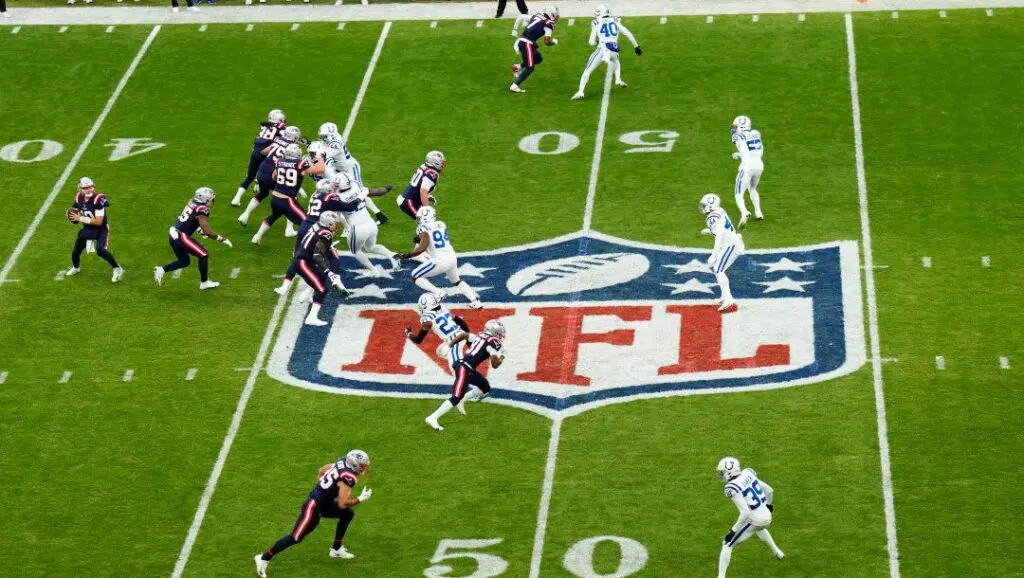

In [100]:
# display the image
from IPython.display import Image, display
display(Image("match.jpg"))

In [101]:
# convert the jpg file to base64

import base64
def encode_image(image_path):
	with open(image_path, mode="rb") as image_file:
		return base64.b64encode(image_file.read()).decode("utf-8")
		
byte_image = encode_image("match.jpg")
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=API_KEY_GEMINI, temperature=0.2)

prompt = "What is in this image ?"

message = HumanMessage(
content=[
		{"type":"text", "text":prompt},
		{"type":"image_url", "image_url":{"url":f"data:image/jpeg;base64,{byte_image}"}}
	]
)

response = llm.invoke([message])

print(response.content)

That's an image of an American football game in progress.  Specifically, it shows a play unfolding on a football field with the NFL logo prominently displayed at midfield.  Players from two teams (one in dark blue/red uniforms and the other in light blue uniforms) are engaged in the action.  The image is taken from a high vantage point, likely from a stadium seating area.


In [102]:
def ask_gemini(prompt, image_path, model="gemini-1.5-flash"):
	byte_image = encode_image(image_path)
	llm = ChatGoogleGenerativeAI(model=model, api_key=API_KEY_GEMINI, temperature=0.0)
	message = HumanMessage(
            content=[
				{"type":"text", "text":prompt},
				{"type":"image_url", "image_url":{"url":f"data:image/jpeg;base64,{byte_image}"}}
			]
    )
	response = llm.invoke([message])
	return response
    


In [104]:
prompt = "How many players are there in each team ?"
result = ask_gemini(prompt=prompt, image_path="match.jpg")
print(result.content)

There are 11 players on each team in this image.  This is the standard number of players on the field for an American football team at a time.


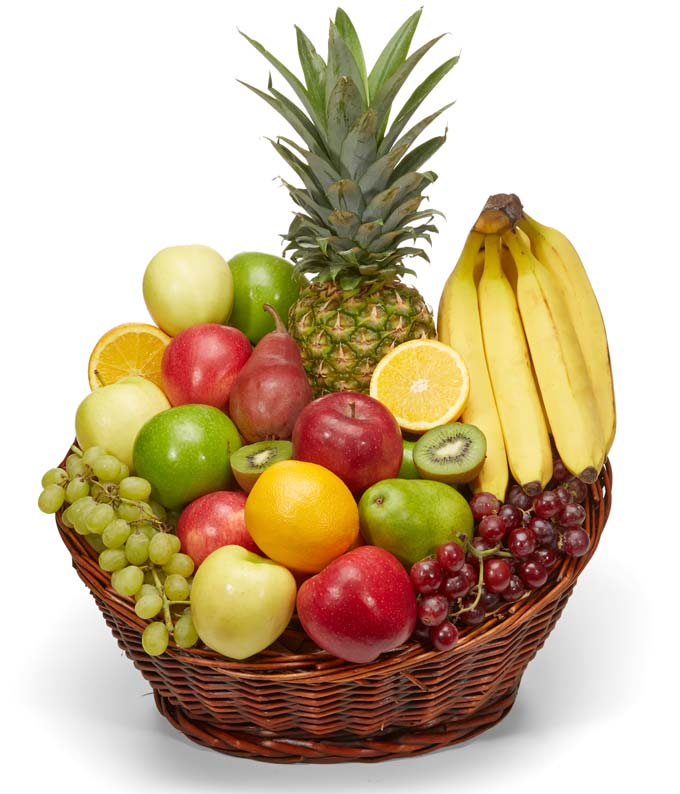

In [105]:
import requests
image_url = "https://fyf.tac-cdn.net/images/products/large/FYF-870.jpg"
content = requests.get(image_url).content
with open("online_image.jpg", mode="wb") as file:
	file.write(content)

display(Image("online_image.jpg"))

In [106]:
prompt = "Describe what you see in the provided image !"
result = ask_gemini(prompt=prompt, image_path="online_image.jpg")
print(result.content)

That's a lovely wicker basket overflowing with a variety of fresh fruits.  There's a pineapple in the center, surrounded by:

* **Apples:**  Several red and green apples of varying sizes.
* **Bananas:** A bunch of ripe yellow bananas.
* **Oranges:** At least one bright orange orange is visible.
* **Grapes:** Both green and red grapes are included.
* **Kiwi:** A couple of kiwi fruits.
* **Pears:** At least one pear is nestled among the other fruits.
* **Other:** There are also some other fruits that are partially obscured or difficult to identify definitively.


The overall impression is one of abundance and freshness.  The fruits appear ripe and ready to eat.
